## Outline for this notbook:
* 1. Load data set
* 2. Join data sets
* 3. Create Republican and Democrat DF's 
* 4. Graphics
    * a. Mean NEW DAILY covid cases by Democratic/ Republican Counties
    * b. Mean TOTAL DAILY covid cases by Democratic/ Republican Counties
    * c. Mean cases per County (as a percent of the population) - ALL Dates
    * d. Mean cases per County (as a percent of the population) - Dates after state reopening May 18th? **NOT FINISHED
    
* 5. Linear Regression Model for Republican Growth Rate and Democrat Growth Rate
* 6. Correlation Matrix

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Bring in data sets
* political data ('data/major_candidates_df.csv')
* covid data set entire('data/covid_main_df.csv')
* Covid snapshot July-15 ('data/july_15_snapshot_covid_df')

In [237]:
major_candidates_df = pd.read_csv('data/major_candidates_df.csv', index_col = 1)
covid_main_df = pd.read_csv('data/covid_main_df.csv', index_col = 1)
covid_main_df['date']= pd.to_datetime(covid_main_df['date'])
july_15_snapshot_df = pd.read_csv('data/july_15_snapshot_covid_df', index_col = 1)
july_15_snapshot_df['date']= pd.to_datetime(july_15_snapshot_df['date'])
#major_candidates_df.drop(axis=1, columns='Affiliation_Code', inplace=

In [238]:
try:
    major_candidates_df.drop(axis=1, columns='Unnamed: 0', inplace=True)
except:
    pass
major_candidates_df.head(1)

,Hillary Clinton,Bernie Sanders,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Affiliation,Aff_Code
County,,,,,,,,,,,,
Alameda,164889,153955,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1


In [239]:
try:
    covid_main_df.drop(axis=1, columns='Unnamed: 0', inplace=True)
except:
    pass
covid_main_df.head()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases
County,,,,,,,,,
Alameda,29.0,0.0,29,0,2020-03-18,7,1671329,0.001735,0.001735
Alameda,36.0,0.0,7,0,2020-03-19,7,1671329,0.000419,0.002154
Alameda,42.0,0.0,6,0,2020-03-20,7,1671329,0.000359,0.002513
Alameda,62.0,0.0,20,0,2020-03-21,7,1671329,0.001197,0.003710
Alameda,72.0,1.0,10,1,2020-03-22,7,1671329,0.000598,0.004308


In [240]:
try:
    july_15_snapshot_df.drop(axis=1, columns='Unnamed: 0', inplace=True)
except:
    pass
july_15_snapshot_df.head()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases
County,,,,,,,,,
Alameda,8615.0,154.0,227,2,2020-07-15,7,1671329,0.013582,0.515458
Alpine,1.0,0.0,0,0,2020-07-15,58,1129,0.000000,0.088574
Amador,44.0,0.0,0,0,2020-07-15,46,39752,0.000000,0.110686
Butte,420.0,4.0,38,0,2020-07-15,28,219186,0.017337,0.191618
Calaveras,75.0,0.0,1,0,2020-07-15,44,45905,0.002178,0.163381


### 2. Join the data
* BIG data set = covid_political_master
* Day snapshot = covid_political_July15_df

In [272]:
covid_political_master_df = covid_main_df.join(major_candidates_df, how='inner')
covid_political_master_df.head(3)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,...,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Affiliation,Aff_Code
County,,,,,,,,,,,,,,,,,,,,,
Alameda,29.0,0.0,29,0,2020-03-18,7,1671329,0.001735,0.001735,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1
Alameda,36.0,0.0,7,0,2020-03-19,7,1671329,0.000419,0.002154,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1
Alameda,42.0,0.0,6,0,2020-03-20,7,1671329,0.000359,0.002513,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1


In [242]:
#covid_political_July15_df = july_15_snapshot_df.join(major_candidates_df, how='inner')
covid_political_July15_df.head(3)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,...,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Affiliation,Aff_Code
County,,,,,,,,,,,,,,,,,,,,,
Alameda,8615.0,154.0,227,2,2020-07-15,7,1671329,0.013582,0.515458,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1
Alpine,1.0,0.0,0,0,2020-07-15,58,1129,0.000000,0.088574,113,...,123,19,7,5,154,250,38.118812,61.881188,Democrat,1
Amador,44.0,0.0,0,0,2020-07-15,46,39752,0.000000,0.110686,2516,...,4868,478,399,217,5962,4902,54.878498,45.121502,Republican,0


### 3. Create Republican and Democrat DF's / Explore data

In [243]:
# create dem and rep dataframes
dems_df = covid_political_master_df[covid_political_master_df['Aff_Code'] == 1]
# dems_df.head()

repub_df = covid_political_master_df[covid_political_master_df['Aff_Code'] == 0]
repub_df.head(1)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,...,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Affiliation,Aff_Code
County,,,,,,,,,,,,,,,,,,,,,
Amador,0.0,0.0,0,0,2020-03-18,46,39752,0.0,0.0,2516,...,4868,478,399,217,5962,4902,54.878498,45.121502,Republican,0


In [244]:
dems_df.head(1)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,...,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Affiliation,Aff_Code
County,,,,,,,,,,,,,,,,,,,,,
Alameda,29.0,0.0,29,0,2020-03-18,7,1671329,0.001735,0.001735,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1


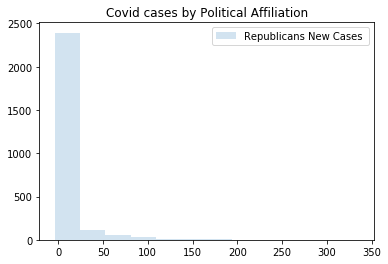

In [245]:
fig, ax = plt.subplots()

ax.hist(repub_df['newcountconfirmed'], alpha = 0.2, label = 'Republicans New Cases ', density = None, bins = 12)
#ax.hist(dems_df['%_pop_new_cases'], alpha = 0.2, color = 'blue', label = 'Democrats New Cases', density = True, bins=12)
ax.set_title('Covid cases by Political Affiliation');
#ax.set_xlabel('% population new cases')
#ax.set_xlim(0, .1)
ax.legend();

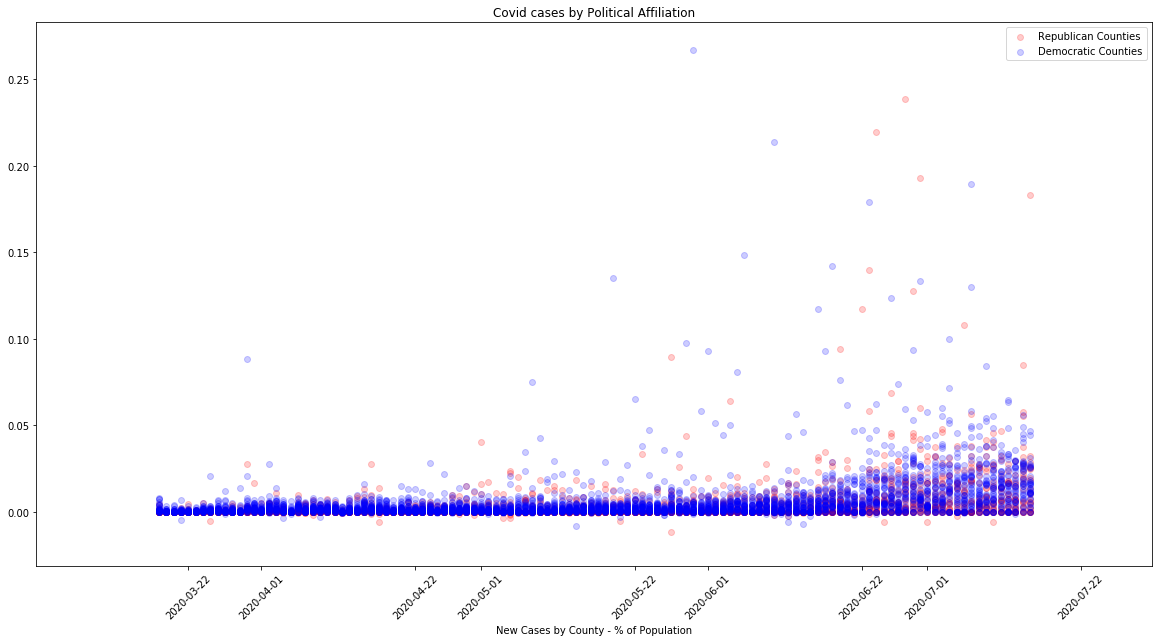

In [246]:
fig, ax = plt.subplots(figsize = (20,10))



ax.scatter(repub_df['date'], repub_df['%_pop_new_cases'],  alpha = 0.2, color= 'red', label = 'Republican Counties ')
ax.scatter(dems_df['date'], dems_df['%_pop_new_cases'], alpha = 0.2, color = 'blue', label = 'Democratic Counties')
ax.set_title('Covid cases by Political Affiliation');
ax.set_xlabel('New Cases by County - % of Population')
plt.xticks(rotation=45)
#ax.set_xlim(0, .1)
ax.legend();

### a. Mean NEW DAILY covid cases by Democratic/ Republican Counties

In [247]:
mean_daily_new_cases_dem = dems_df.groupby('date')['%_pop_new_cases'].mean().reset_index()
mean_daily_new_cases_dem.head(3)

,date,%_pop_new_cases
0,2020-03-18,0.001907
1,2020-03-19,0.000489
2,2020-03-20,0.000526


In [248]:
mean_daily_new_cases_repub = repub_df.groupby('date')['%_pop_new_cases'].mean().reset_index()
mean_daily_new_cases_repub.head(3)

,date,%_pop_new_cases
0,2020-03-18,0.000426
1,2020-03-19,0.000041
2,2020-03-20,0.000077


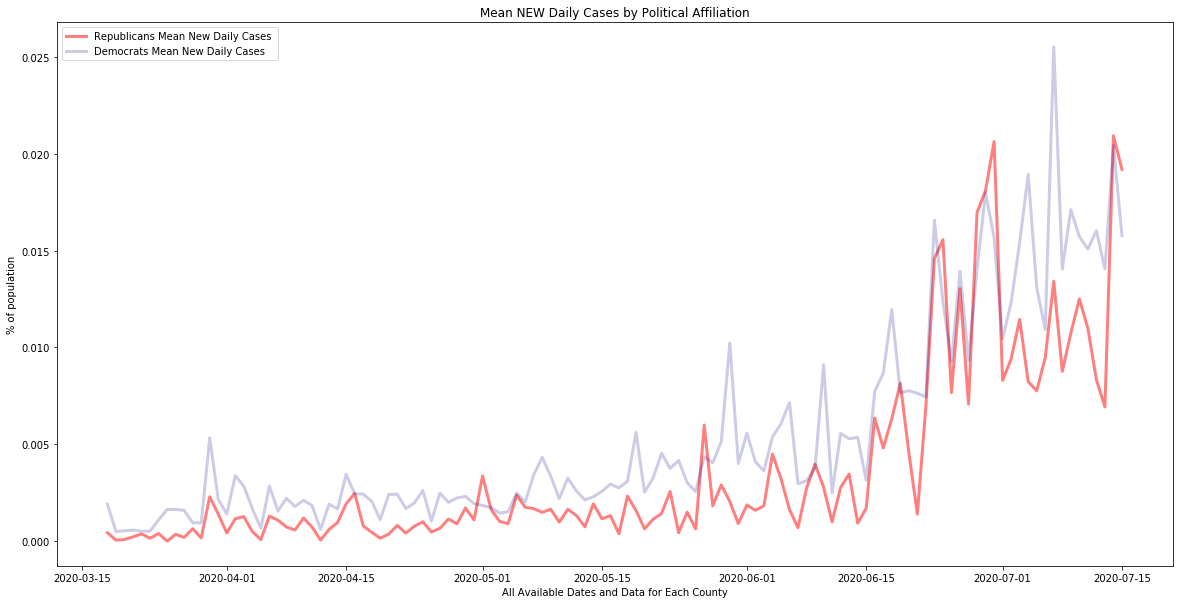

In [321]:
fig, ax = plt.subplots(figsize = (20,10))

ax.plot(mean_daily_new_cases_repub['date'], mean_daily_new_cases_repub['%_pop_new_cases'],  alpha = 0.5, linewidth=3, color='red', label = 'Republicans Mean New Daily Cases ')
ax.plot(mean_daily_new_cases_dem['date'], mean_daily_new_cases_dem['%_pop_new_cases'], alpha = 0.2, linewidth=3, color = 'darkblue', label = 'Democrats Mean New Daily Cases')
ax.set_title('Mean NEW Daily Cases by Political Affiliation');
ax.set_xlabel('All Available Dates and Data for Each County')
ax.set_ylabel('% of population')
plt.xticks(rotation=0)
#ax.set_xticklabels(rotation=90)
#ax.set_xlim(0, .1)
ax.legend();

plt.savefig('images/dem_repub_meandailyNEWcases_Map_5.png')

## b. Mean TOTAL DAILY covid cases by Democratic/ Republican Counties

In [266]:
mean_daily_total_cases_dem = dems_df.groupby('date')['%_pop_total_cases'].mean().reset_index()
mean_daily_total_cases_dem.tail(3)

,date,%_pop_total_cases
117,2020-07-13,0.622741
118,2020-07-14,0.643174
119,2020-07-15,0.658950


In [251]:
mean_daily_total_cases_repub = repub_df.groupby('date')['%_pop_total_cases'].mean().reset_index()
mean_daily_total_cases_repub.head(3)

,date,%_pop_total_cases
0,2020-03-18,0.000426
1,2020-03-19,0.000467
2,2020-03-20,0.000544


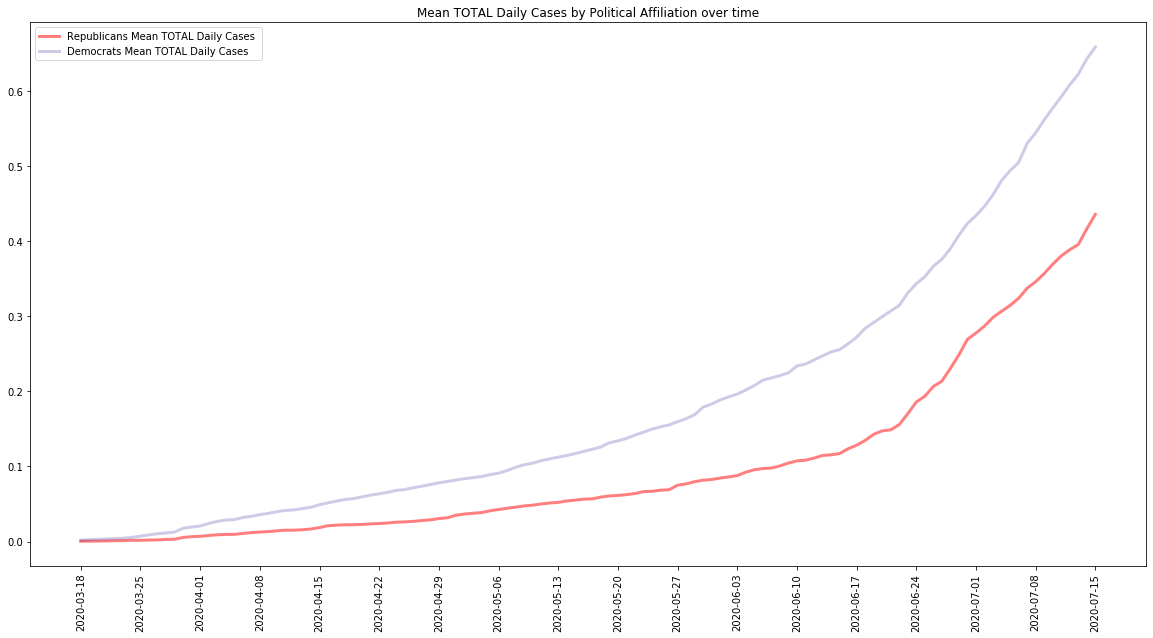

In [322]:
fig, ax = plt.subplots(figsize = (20,10))

ax.plot(mean_daily_total_cases_repub['date'], mean_daily_total_cases_repub['%_pop_total_cases'],  alpha = 0.5, linewidth=3, color='red', label = 'Republicans Mean TOTAL Daily Cases ')
ax.plot(mean_daily_total_cases_dem['date'], mean_daily_total_cases_dem['%_pop_total_cases'], alpha = 0.2, linewidth=3, color = 'darkblue', label = 'Democrats Mean TOTAL Daily Cases')
ax.set_title('Mean TOTAL Daily Cases by Political Affiliation over time');
#ax.set_xlabel('3/18/2020 - 07/15/2020')
plt.xticks(mean_daily_total_cases_dem['date'][0::7], rotation=90)
#ax.set_xticklabels(rotation=90)
# ax.set_xlim(0, .1)
#ax.set_yscale('log')
ax.legend();


plt.savefig('images/dem_repub_meandailyTOTALcases_Map_8.png')

### c. Mean cases per County (as a percent of the population) - ALL Dates

In [253]:
# currently for all days, WOULD BE INTERESTING ro do it after reopening.
mean_COUNTY_total_cases_dem = dems_df.groupby(['County','%_Republican'] )['%_pop_total_cases'].mean().reset_index()
mean_COUNTY_total_cases_dem.sort_values('%_pop_total_cases', inplace=True)
mean_COUNTY_total_cases_dem.head(3)

,County,%_Republican,%_pop_total_cases
33,Trinity,45.118041,0.007394
11,Mendocino,22.190581,0.030327
2,Butte,44.308922,0.031628


In [254]:
mean_COUNTY_total_cases_repub = repub_df.groupby(['County','%_Republican'])['%_pop_total_cases'].mean().reset_index()
mean_COUNTY_total_cases_repub.sort_values('%_pop_total_cases', inplace=True)
mean_COUNTY_total_cases_repub.head(3)

,County,%_Republican,%_pop_total_cases
11,Modoc,70.254958,0.000218
15,Sierra,54.813530,0.015229
20,Tuolumne,52.543403,0.015236


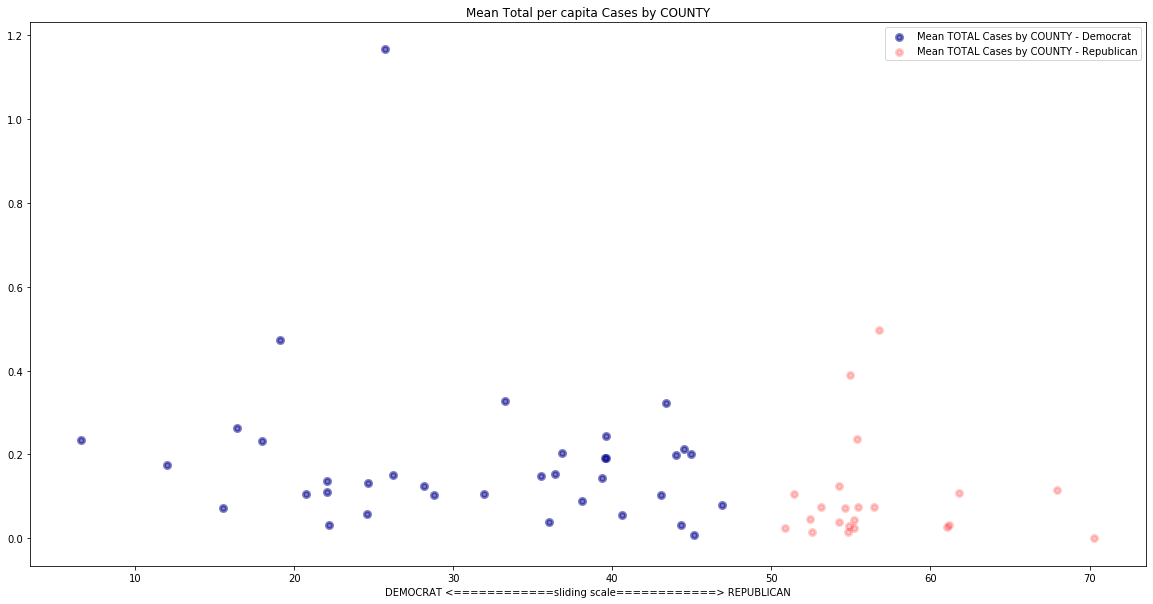

In [255]:
fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(mean_COUNTY_total_cases_dem['%_Republican'], mean_COUNTY_total_cases_dem['%_pop_total_cases'],  alpha = 0.5, linewidth=3, color='darkblue', label = 'Mean TOTAL Cases by COUNTY - Democrat')
ax.scatter(mean_COUNTY_total_cases_repub['%_Republican'], mean_COUNTY_total_cases_repub['%_pop_total_cases'], alpha = 0.2, linewidth=3, color = 'red', label = 'Mean TOTAL Cases by COUNTY - Republican')
ax.set_title('Mean Total per capita Cases by COUNTY');
ax.set_xlabel('DEMOCRAT <============sliding scale============> REPUBLICAN')
#plt.xticks(mean_COUNTY_total_cases_dem['date'][0::7], rotation=90)
#ax.set_xticklabels(rotation=90)
#ax.set_xlim(0, .1)
ax.legend();

plt.savefig('images/dem_repub_meanTOTALcases_sliding_scale_7.png')

### d. Mean cases per County (as a percent of the population) - Dates after state reopening May 18th? 

In [256]:
after_reopen_dems_df = dems_df.loc[dems_df['date'] >= '2020-05-18']
after_reopen_dems_df.head(3)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,...,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Affiliation,Aff_Code
County,,,,,,,,,,,,,,,,,,,,,
Alameda,2442.0,88.0,53,3,2020-05-18,7,1671329,0.003171,0.146111,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1
Alameda,2493.0,88.0,51,0,2020-05-19,7,1671329,0.003051,0.149163,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1
Alameda,2554.0,88.0,61,0,2020-05-20,7,1671329,0.003650,0.152813,164889,...,29097,7614,4807,1973,43491,318844,12.002981,87.997019,Democrat,1


In [257]:
mean_COUNTY_total_cases_dem_after_reopen = after_reopen_dems_df.groupby(['County','%_Republican'] )['%_pop_total_cases'].mean().reset_index()
mean_COUNTY_total_cases_dem_after_reopen.sort_values('%_pop_total_cases', inplace=True)
mean_COUNTY_total_cases_dem_after_reopen.head(3)



,County,%_Republican,%_pop_total_cases
33,Trinity,45.118041,0.013659
11,Mendocino,22.190581,0.054961
2,Butte,44.308922,0.058444


In [258]:
after_reopen_repub_df = repub_df.loc[repub_df['date'] >= '2020-05-18']
after_reopen_repub_df.head(3)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,...,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Affiliation,Aff_Code
County,,,,,,,,,,,,,,,,,,,,,
Amador,8.0,0.0,0,0,2020-05-18,46,39752,0.000000,0.020125,2516,...,4868,478,399,217,5962,4902,54.878498,45.121502,Republican,0
Amador,9.0,0.0,1,0,2020-05-19,46,39752,0.002516,0.022640,2516,...,4868,478,399,217,5962,4902,54.878498,45.121502,Republican,0
Amador,9.0,0.0,0,0,2020-05-20,46,39752,0.000000,0.022640,2516,...,4868,478,399,217,5962,4902,54.878498,45.121502,Republican,0


### 5. Linear Regression Model for Republican Growth Rate and Democrat Growth Rate


In [259]:
from sklearn.linear_model import LinearRegression as LR
X = (mean_daily_total_cases_repub['date'] - mean_daily_total_cases_repub['date'].min()).values.reshape(-1,1)/86400000000000
repub_model = LR().fit(X,  
    np.log(mean_daily_total_cases_repub['%_pop_total_cases']))
repub_growth_rate = np.exp(repub_model.coef_)
repub_growth_rate

array([1.04459018])

In [260]:
X = (mean_daily_total_cases_dem['date'] - mean_daily_total_cases_dem['date'].min()).values.reshape(-1,1)/86400000000000
dem_model = LR().fit(X,  
    np.log(mean_daily_total_cases_dem['%_pop_total_cases']))
dem_growth_rate = np.exp(dem_model.coef_)
dem_growth_rate

array([1.03707446])

In [261]:
#what does the intercept mean?
repub_model.intercept_, dem_model.intercept_

(-5.748803869835946, -4.46955567946708)

### 6. Correlation Matrix 

In [262]:
covid_political_July15_df.corr(method='pearson').round(3)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,Bernie Sanders,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Aff_Code
totalcountconfirmed,1.000,0.992,0.973,0.877,-0.437,0.964,0.093,0.297,0.955,0.948,0.785,0.840,0.894,0.860,0.812,0.952,-0.234,0.234,0.211
totalcountdeaths,0.992,1.000,0.944,0.845,-0.362,0.938,0.075,0.260,0.946,0.937,0.722,0.800,0.848,0.809,0.754,0.943,-0.221,0.221,0.169
newcountconfirmed,0.973,0.944,1.000,0.864,-0.509,0.970,0.145,0.273,0.935,0.930,0.848,0.866,0.931,0.907,0.867,0.933,-0.224,0.224,0.246
newcountdeaths,0.877,0.845,0.864,1.000,-0.445,0.881,0.082,0.344,0.827,0.826,0.863,0.847,0.884,0.867,0.871,0.827,-0.167,0.167,0.237
Rank,-0.437,-0.362,-0.509,-0.445,1.000,-0.590,-0.055,-0.354,-0.548,-0.554,-0.670,-0.659,-0.639,-0.686,-0.671,-0.551,0.519,-0.519,-0.499
Population,0.964,0.938,0.970,0.881,-0.590,1.000,0.086,0.254,0.982,0.979,0.890,0.941,0.964,0.948,0.913,0.981,-0.309,0.309,0.292
%_pop_new_cases,0.093,0.075,0.145,0.082,-0.055,0.086,1.000,0.263,0.053,0.049,0.094,0.052,0.095,0.090,0.089,0.051,0.195,-0.195,-0.068
%_pop_total_cases,0.297,0.260,0.273,0.344,-0.354,0.254,0.263,1.000,0.219,0.206,0.233,0.203,0.250,0.238,0.233,0.213,-0.171,0.171,0.179
Hillary Clinton,0.955,0.946,0.935,0.827,-0.548,0.982,0.053,0.219,1.000,0.997,0.808,0.912,0.909,0.887,0.840,0.999,-0.386,0.386,0.298
Bernie Sanders,0.948,0.937,0.930,0.826,-0.554,0.979,0.049,0.206,0.997,1.000,0.817,0.917,0.913,0.893,0.848,0.999,-0.397,0.397,0.311


### 7. Hypothesis Testing

**H null: there is no difference between COVID rates from Republican and Democratic Counties**

**H alt: there is a difference between COVID rates in Republican and Democratic Counties**

* Sample 1: Democratic Counties: mean county total cases by % of population

* Sample 2: Republican Counties: mean county total cases by % of population

alpha = .05

In [263]:
from scipy.stats import ttest_ind
sample_1 = mean_COUNTY_total_cases_dem['%_pop_total_cases']
sample_2 = mean_COUNTY_total_cases_repub['%_pop_total_cases']

In [264]:
t_statistic, p_value = ttest_ind(sample_1, sample_2, equal_var=False)

f't_statistic: {t_statistic}, p_value: {p_value}'

' t_statistic: 2.0367313318783062, p_value: 0.046430414652248744'

**Conclusion of TTEST: Reject the Null Hypothesis. Accept the Alt Hypothesis** 

In [279]:
len(sample_1), len(sample_2)

(36, 22)

(array([4., 2., 5., 5., 5., 4., 4., 3., 0., 2., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]),
 array([0.00739384, 0.03959305, 0.07179227, 0.10399148, 0.13619069,
        0.1683899 , 0.20058912, 0.23278833, 0.26498754, 0.29718675,
        0.32938597, 0.36158518, 0.39378439, 0.42598361, 0.45818282,
        0.49038203, 0.52258124, 0.55478046, 0.58697967, 0.61917888,
        0.65137809, 0.68357731, 0.71577652, 0.74797573, 0.78017495,
        0.81237416, 0.84457337, 0.87677258, 0.9089718 , 0.94117101,
        0.97337022, 1.00556943, 1.03776865, 1.06996786, 1.10216707,
        1.13436629, 1.1665655 ]),
 <a list of 36 Patch objects>)

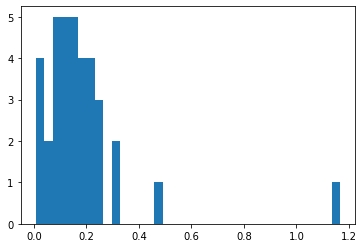

In [282]:
plt.hist(sample_1, bins=36)

(array([3., 7., 1., 4., 2., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1.]),
 array([2.17518032e-04, 2.27578189e-02, 4.52981197e-02, 6.78384206e-02,
        9.03787214e-02, 1.12919022e-01, 1.35459323e-01, 1.57999624e-01,
        1.80539925e-01, 2.03080226e-01, 2.25620527e-01, 2.48160827e-01,
        2.70701128e-01, 2.93241429e-01, 3.15781730e-01, 3.38322031e-01,
        3.60862332e-01, 3.83402632e-01, 4.05942933e-01, 4.28483234e-01,
        4.51023535e-01, 4.73563836e-01, 4.96104137e-01]),
 <a list of 22 Patch objects>)

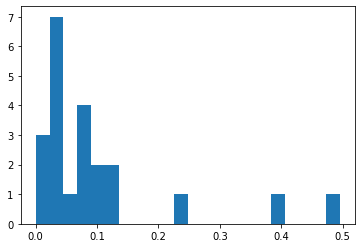

In [283]:
plt.hist(sample_2, bins=22)

In [314]:
#Personr test (results= correlation, p-value) COULDNT GET THIS TO WORK _ COME BEACK IF TIME

# from scipy.stats import pearsonr
#pearsonr(covid_political_master_df['%_Republican'], covid_political_master_df['%_pop_total_cases'])
#covid_political_master_df['%_Republican']
#covid_political_master_df['%_pop_total_cases']

### Mann Whitney U Test

* After looking at the distributions of Sample1 and Sample2 we noticed that they do not look normal. Kin-Yip suggested running a MW test

* Sample_3: July 15th (last day) snapshot - Democrats
* Sample_4: July 15 (last day) snapshot - Republicans

In [302]:
# use the covid snapshot data,ie last date  

from scipy.stats import mannwhitneyu

#create dem and repub DF
dems_covid_political_July15_df = covid_political_July15_df.loc[covid_political_July15_df['Aff_Code'] == 1]
repub_covid_political_July15_df = covid_political_July15_df.loc[covid_political_July15_df['Aff_Code'] == 0]

#create samples
sample_3 = dems_covid_political_July15_df['%_pop_total_cases']
sample_4 = repub_covid_political_July15_df['%_pop_total_cases']

#run test
stats_value, p_value = mannwhitneyu(sample_3, sample_4, use_continuity=True, alternative=None)
print(f'Mann-Whitney U statistic: {stats_value}, p-Value: {p_value}')

Mann-Whitney U statistic: 269.0, p-Value: 0.021321946830712007


**Conclusion of Mann-Whitney U: Reject the Null Hypothesis. Accept the Alt Hypothesis**

In [303]:
len(sample_3), len(sample_4)


(36, 22)

(array([2., 6., 1., 6., 6., 4., 0., 2., 3., 2., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]),
 array([0.01628002, 0.12481436, 0.2333487 , 0.34188304, 0.45041738,
        0.55895172, 0.66748606, 0.7760204 , 0.88455474, 0.99308908,
        1.10162342, 1.21015776, 1.3186921 , 1.42722644, 1.53576078,
        1.64429512, 1.75282946, 1.8613638 , 1.96989814, 2.07843248,
        2.18696682, 2.29550116, 2.4040355 , 2.51256984, 2.62110418,
        2.72963852, 2.83817286, 2.9467072 , 3.05524154, 3.16377588,
        3.27231022, 3.38084456, 3.4893789 , 3.59791324, 3.70644758,
        3.81498192, 3.92351627]),
 <a list of 36 Patch objects>)

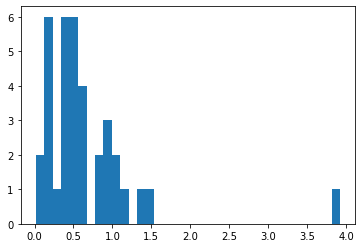

In [295]:
plt.hist(sample_3, bins=36)

(array([3., 5., 4., 2., 0., 1., 0., 2., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 1.]),
 array([0.        , 0.0863678 , 0.17273559, 0.25910339, 0.34547119,
        0.43183899, 0.51820678, 0.60457458, 0.69094238, 0.77731018,
        0.86367797, 0.95004577, 1.03641357, 1.12278136, 1.20914916,
        1.29551696, 1.38188476, 1.46825255, 1.55462035, 1.64098815,
        1.72735594, 1.81372374, 1.90009154]),
 <a list of 22 Patch objects>)

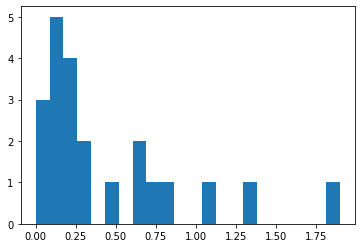

In [296]:
plt.hist(sample_4, bins=22)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_cols = ['tot_lpss', 'lpss_per_1000', 'tot_hpss',
       'hpss_per_1000', 'pct_hpss',
       'pct_vehicle_avail', 'pct_poverty']
df_sub = df[scatter_cols]
scatter_matrix(df_sub, alpha = 0.2, figsize = (20, 20), diagonal = 'kde');